# Diminutive Suffix Productivity: further cleaning and exploratory  analysis
Juan Berrios | jeb358@pitt.edu | Last updated: March 19, 2020

**Summary and overview:**

- This notebook is a continuation of the [corpus processing notebook](https://github.com/Data-Science-for-Linguists-2020/Diminutive-Suffix-Productivity/blob/master/code/corpus_processing.ipynb) in my repository. The purpose is to finish cleaning the data frame objects I've built (which were previously pickled in order to be loaded here) and create a master, cross-dialectal data frame for exploratory analysis.

**Contents:**
1. [Preparation](#1.-Preparation): includes the necessary preparations and loading of the files.
2. [Further cleaning and manipulation](#2.-Further-cleaning-and-manipulation): includes code for performing further cleaning on the data. New, refined columns needed for explatory analysis are also added.
3. [Exploratory analysis](#3.-Exploratory-analysis): the start of the analysis, with a focus on descriptive statistics and data visualization.
4. [Storing files](#4.-Storing-files): includes code for storing the results as pickled files.

## 1. Preparation

- Loading libraries and additional settings:

In [103]:
#Importing libraries
import pickle, re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Turning pretty print off:
%pprint

# Settings for plotting

matplotlib.rcParams['font.sans-serif'] = "Century Gothic"
matplotlib.rcParams['font.family'] = "sans-serif"

#Releasing all output:                                            
from IPython.core.interactiveshell import InteractiveShell #Prints all commands rather than the last one.
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


- Loading pickle files:

In [2]:
ar_DF = pd.read_pickle('ar_DF.pkl')
bo_DF = pd.read_pickle('bo_DF.pkl')
cl_DF = pd.read_pickle('cl_DF.pkl')
co_DF = pd.read_pickle('co_DF.pkl')
cr_DF = pd.read_pickle('cr_DF.pkl')
cu_DF = pd.read_pickle('cu_DF.pkl')
do_DF = pd.read_pickle('do_DF.pkl')
ec_DF = pd.read_pickle('ec_DF.pkl')
es_DF = pd.read_pickle('es_DF.pkl')
gt_DF = pd.read_pickle('gt_DF.pkl')
hn_DF = pd.read_pickle('hn_DF.pkl')
mx_DF = pd.read_pickle('mx_DF.pkl')
ni_DF = pd.read_pickle('ni_DF.pkl')
pa_DF = pd.read_pickle('pa_DF.pkl')
pe_DF = pd.read_pickle('pe_DF.pkl')
pr_DF = pd.read_pickle('pr_DF.pkl')
py_DF = pd.read_pickle('py_DF.pkl')
sv_DF = pd.read_pickle('sv_DF.pkl')
us_DF = pd.read_pickle('us_DF.pkl')
uy_DF = pd.read_pickle('uy_DF.pkl')

- Double checking that they were saved as the right type:

In [3]:
type(ar_DF)
type(bo_DF)
type(cl_DF)
type(co_DF)
type(cr_DF)
type(cu_DF)
type(do_DF)
type(ec_DF)
type(es_DF)
type(gt_DF)
type(hn_DF)
type(mx_DF)
type(ni_DF)
type(pa_DF)
type(pe_DF)
type(pr_DF)
type(py_DF)
type(sv_DF)
type(us_DF)
type(uy_DF)

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>

- Looks good. Now let's take a first look at the size (number of rows, since all have 6 colums) of the data frames as they are:

In [4]:
print('Argentina rows:', ar_DF.shape[0])
print('Bolivia rows:', bo_DF.shape[0])
print('Chile rows:', cl_DF.shape[0])
print('Colombia rows:', co_DF.shape[0])
print('Costa Rica:', cr_DF.shape[0])
print('Cuba rows:', cu_DF.shape[0])
print('Dominican Republic rows:', do_DF.shape[0])
print('Ecuador rows:', ec_DF.shape[0])
print('Spain rows:', es_DF.shape[0])
print('Guatemala rows:', gt_DF.shape[0])
print('Honduras rows:', hn_DF.shape[0])
print('Mexico rows:', mx_DF.shape[0])
print('Nicaragua rows:', ni_DF.shape[0])
print('Panama rows:', pa_DF.shape[0])
print('Peru rows:', pe_DF.shape[0])
print('Puerto Rico rows:', pr_DF.shape[0])
print('Paraguay rows:', py_DF.shape[0])
print('El Salvador rows:', sv_DF.shape[0])
print('US rows rows:', us_DF.shape[0])
print('Uruguay rows:', uy_DF.shape[0])

Argentina rows: 616845
Bolivia rows: 143682
Chile rows: 247619
Colombia rows: 646821
Costa Rica: 125645
Cuba rows: 214837
Dominican Republic rows: 145577
Ecuador rows: 234485
Spain rows: 1719752
Guatemala rows: 224592
Honduras rows: 136451
Mexico rows: 939030
Nicaragua rows: 129622
Panama rows: 455817
Peru rows: 451522
Puerto Rico rows: 145101
Paraguay rows: 103839
El Salvador rows: 146933
US rows rows: 626729
Uruguay rows: 137585


- And as a last step to use less memory and write shorter, more efficient code let's build a master data frame that includes all varieties. Since there is a `Variety` column that I added in the first notebook, the rows can be properly identified and I can go back to the individual by-variety data frames if needed. I'll also verify how large it is.

In [5]:
master_DF = pd.concat([ar_DF, bo_DF, cl_DF, co_DF, cr_DF, cu_DF, do_DF, ec_DF, es_DF, gt_DF, hn_DF,
                mx_DF, ni_DF, pa_DF, pe_DF, pr_DF, py_DF, sv_DF, us_DF, uy_DF], sort=True)

In [6]:
print('Master rows:', master_DF.shape[0])

Master rows: 7592484


- I noticed that some data frames had NaN values, which might be why I was running into some issues in the prior notebook (the test one didn't have any). To make sure that won't be a problem anymore I'll drop those rows:

In [7]:
master_DF = master_DF.dropna() 

In [8]:
print('Master rows:', master_DF.shape[0])

Master rows: 7590609


In [9]:
master_DF.keys() #The order of the columns was shuffled, to turn it back:

Index(['Lemma', 'POS', 'SourceID', 'TokenID', 'Variety', 'Word'], dtype='object')

In [10]:
master_DF = master_DF[['SourceID', 'TokenID', 'Lemma', 'Word', 'POS', 'Variety']]

In [11]:
master_DF.keys() #Success

Index(['SourceID', 'TokenID', 'Lemma', 'Word', 'POS', 'Variety'], dtype='object')

## 2. Further cleaning and manipulation

- In the first notebook I reduced a gigantic amount (30GB when zipped) of data to manageable smaller sizes. The data frames as they are only include tokens that end in the segments of interest. The problem is that many of those just happen to end in the same segments as diminutives but are not diminutives themselves. To solve this problem, let's first remove categories to which the morphological pattern doesn't apply (and refine the POS column in the process):

In [12]:
master_DF['POS'].value_counts() #Most of this I don't need

n           1370111
nms         1306937
o            848151
nfs          707053
nmp          635693
vip-3s       613522
jms          371646
j            360502
jfs          328370
vip-1s       235896
nfp          135066
vps-ms       129978
jmp          102855
vsp-1/3s     100798
jfp           85536
vip-2s        81871
r             49707
v             45588
vps-fs        36387
vps-mp        19406
vps-fp        13977
vsp-2s         6941
np             1562
x              1142
m$              991
i               420
vr              201
fn              159
vm-2s           108
xy               19
e                12
y                 3
vm-3s             1
Name: POS, dtype: int64

In [13]:
master_DF = master_DF[master_DF['POS'].str.contains('n|j')] #Extracts only noun and adjective classes. A very limited
                                                            #set of gerunds can also take diminutive suffixes but the 
                                                            #amount is negligeable and won't be enough for analysis so 
                                                            #I'll exclude them.

In [14]:
master_DF.shape #Current size

(5405490, 6)

In [15]:
master_DF['POS'].value_counts() #That last category is the only one that shouldn't be there. Let's remove it.

n          1370111
nms        1306937
nfs         707053
nmp         635693
jms         371646
j           360502
jfs         328370
nfp         135066
jmp         102855
jfp          85536
np            1562
fn             159
Name: POS, dtype: int64

In [16]:
master_DF = master_DF[master_DF['POS'] != ('fn')] 

In [17]:
master_DF['POS'].value_counts() #Success. 

n          1370111
nms        1306937
nfs         707053
nmp         635693
jms         371646
j           360502
jfs         328370
nfp         135066
jmp         102855
jfp          85536
np            1562
Name: POS, dtype: int64

In [18]:
master_DF.sample(5) #Let's take a sample to make sure all's going well:

,SourceID,TokenID,Lemma,Word,POS,Variety
9561034,528368,2416644862,manuscrito,manuscrita,jfs,ES
1586042,157012,293280632,visita,visita,nfs,CL
6502513,495728,1662194015,icnita,icnitas,n,ES
21658888,620270,2039438248,cepillo,Cepillo,nms,ES
1614634,1945085,973118422,delito,delito,nms,HN


- The POS column provides useful information that I might use for linguistic analysis, so let's refine it:

In [19]:
master_DF['POS'].unique()

array(['nmp    ', 'nfs    ', 'n', 'jfs    ', 'nms    ', 'j', 'jms    ',
       'nfp    ', 'jmp    ', 'jfp    ', 'np'], dtype=object)

- There are two main problems here. First, that for some reason I couldn't find in the documentation some tokens were not tagged for gender and number (those tagged 'j' and 'n'). Secondly, there is extraneous white space in some categories, which was giving me issues when first trying out the code. Let's take care of one issue at a time:

In [20]:
master_DF['POS'] = master_DF['POS'].str.strip()

In [21]:
master_DF['POS'].unique() #White space problem solved

array(['nmp', 'nfs', 'n', 'jfs', 'nms', 'j', 'jms', 'nfp', 'jmp', 'jfp',
       'np'], dtype=object)

- Now I'll create a simplified, binary POS column where each token is either a noun or an adjective. Let's also make the coding more transparent while we are at it:

In [22]:
pos_dict = {'n': 'Noun', 'nms': 'Noun', 'nfs': 'Noun', 'nmp': 'Noun', 'nfp': 'Noun', 'np': 'Noun', 
             'j': 'Adjective', 'jms': 'Adjective', 'jfs': 'Adjective', 'jmp': 'Adjective', 'jfp': 'Adjective'}

In [23]:
master_DF['POS_binary'] = master_DF['POS'].map(pos_dict)

In [24]:
master_DF.sample(10) #It works. 

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary
2137263,207118,1741482369,infinito,infinitos,nmp,CO,Noun
8663398,93295,817281631,poquito,poquito,n,AR,Noun
2746353,782092,257353809,platillo,platillo,nms,MX,Noun
3531015,181461,2611245345,cita,cita,nfs,CL,Noun
4311357,231452,127571377,escrito,escritos,nmp,CO,Noun
3280855,2181701,2147185991,hábito,hábito,nms,PE,Noun
3896955,1986036,2336878145,mito,mitos,nmp,MX,Noun
4065841,229073,438066207,estribillo,estribillo,nms,CO,Noun
3630919,2190382,109596229,brillo,brillo,nms,PA,Noun
3822460,471676,2305938488,sencillo,sencilla,jfs,ES,Adjective


- As a solution for tokens that are not tagged for gender and number I'll create an 'Unknown label'. It is also possible to write code that will tag them based on certain patterns. Since that is not the focus of my analysis I won't do that now, but I might come back here if I have some extra time later. 

In [25]:
#Build dictionaries that map POS into desired gender and number values:

number_dict = {'n': 'unknown', 'nms': 'singular', 'nfs': 'singular', 'nmp': 'plural', 'nfp': 'plural', 
                  'np': 'unknown', 'j': 'unknown', 'jms': 'singular', 'jfs': 'singular', 'jmp': 'plural', 
                  'jfp': 'plural'}

gender_dict = {'n': 'unknown', 'nms': 'masculine', 'nfs': 'feminine', 'nmp': 'masculine', 'nfp': 'feminine', 
                  'np': 'unknown', 'j': 'unknown', 'jms': 'masculine', 'jfs': 'feminine', 'jmp': 'masculine', 
                  'jfp': 'feminine'}

In [26]:
master_DF['Number'] = master_DF['POS'].map(number_dict) #Map new values

In [27]:
master_DF.sample(5) #Works well

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number
1170998,1054111,37015008,poquito,poquito,n,PR,Noun,unknown
448287,2119468,1592720463,éxito,éxito,n,NI,Noun,unknown
11115343,1764669,1893881538,animalito,animalito,n,ES,Noun,unknown
4445730,1695214,552898774,insólito,insólito,jms,ES,Adjective,singular
13532175,1787611,2125071812,tallito,tallitos,n,ES,Noun,unknown


In [28]:
master_DF['Gender'] = master_DF['POS'].map(gender_dict)  #Map new values

In [29]:
master_DF.sample(5) #Works well

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender
2739279,174559,1863737153,inscrito,inscritas,j,CL,Adjective,unknown,unknown
1107196,760445,857513342,cita,cita,nfs,MX,Noun,singular,feminine
4488678,1003534,2543206323,favorito,favorito,jms,PA,Adjective,singular,masculine
869377,1626521,2099829641,castillo,Castillo,nms,EC,Noun,singular,masculine
4061125,1001415,849693026,sencillo,sencillo,jms,PA,Adjective,singular,masculine


-  Now the last (and most difficult) cleaning task. Even after removing millions of rows in prior steps, there are still many tokens that do not belong in the data frame because they are (i) lexicalized forms that have acquired a meaning of their own, or (ii) words that meet the word class and phonological requirement but simply do not happen to be diminutives. At first, I was going to try to solve this using a dictionary of Spanish as a list that I could cross-compare with the `Lemma` column. This is because diminituvized forms with a predictable meaning wouldn't show up in such a list. I couldn't find such a resource, though, and making one manually would take a really long time. Conversely and based on my knowledge of the topic, the forms I want to remove are much more frequent than diminutivized forms. It follows that if I extract a list of highly frequent forms from the corpus that end in the segments of interest I can get a list of words that I can later cross-compare with my data frame's `Lemma` column. Coincidentally, the corpus offers a useful resource for this purpose; that is, a lexicon. I'll load that, derive a frequency-based list of lemmas I want to exclude from the data frame from there, and then actually excluse those from the `master_DF` object:

In [30]:
fname = '../../Diminutive-Suffix-Productivity/private/data/span_lexicon/span_dic.txt'     #Loading lexicon
lexicon = pd.read_csv(fname,sep='\t',encoding='iso-8859-1',skiprows=[1],low_memory=False) #Low memory setting required
                                                                                          #due to NaN values

In [31]:
lexicon #A new, lexicon data frame

,wID,word,lemma,PoS
0,1,",","$,",y
1,2,de,de,e
2,3,.,$.,y
3,4,la,la,ld-fs
4,5,y,y,cc
...,...,...,...,...
8754578,11925785,@@999948,NaN,NaN
8754579,11925786,@@99996,NaN,NaN
8754580,11925787,@@999965,NaN,NaN
8754581,11925788,@@999974,NaN,NaN


In [32]:
lexicon = lexicon.rename(columns={"wID": "WordID", "word": "Word", "lemma": "Lemma", "PoS": "POS"}) #Renaming columns.
lexicon

,WordID,Word,Lemma,POS
0,1,",","$,",y
1,2,de,de,e
2,3,.,$.,y
3,4,la,la,ld-fs
4,5,y,y,cc
...,...,...,...,...
8754578,11925785,@@999948,NaN,NaN
8754579,11925786,@@99996,NaN,NaN
8754580,11925787,@@999965,NaN,NaN
8754581,11925788,@@999974,NaN,NaN


In [33]:
lexicon = lexicon.dropna() #Dropping NaN values (non-words that appear at the end of the data frame)
lexicon

,WordID,Word,Lemma,POS
0,1,",","$,",y
1,2,de,de,e
2,3,.,$.,y
3,4,la,la,ld-fs
4,5,y,y,cc
...,...,...,...,...
8474411,11645618,descabellados,descabellar,v
8474412,11645619,hacendados,hacendar,v
8474413,11645620,reposeídas,reposeer,v
8474414,11645621,remozadas,remozar,v


In [34]:
lexicon['POS'].unique() #I have to clean this like I did before.

array(['y', 'e', 'ld-fs', 'cc', 'ld-ms', 'cs', 'ld-mp', 'xx', 'li-ms',
       'po', 'r', 'vip-3s', 'ld-fp', 'li-fs', 'dp-', 'dd-', 'v', 'vip-3p',
       'cS_22', 'vr', 'ld', 'nmp    ', 'nfs    ', 'j', 'pd-3cs', 'mc',
       'ps', 'nms    ', 'nfp    ', 'vii-1/3s', 'dxmp-ind-', 'pi-0cn',
       'pi-0ms', 'vis-3s', 'cS_21', 'dxms-ind-', 'pi', 'dxcs-ind-',
       'vsp-1/3s', 'o', 'n', 'pr-3cs', 'dxfp-ind-', 'pq-3cn', 'dxfs-ind-',
       'm$', 'pr-3cn"', 'jms    ', 'li-mp', 'px-ms', 'vip-1s', 'cS_33',
       'dxfs-', 'vps-ms', 'vif-3s', 'dxcs-dem-', 'jfs    ', 'jmp    ',
       'pr-3cp', 'pi-3cs', 'pp-2cs', 'vip-1p', 'px', 'vc-1/3s', 'pp-1cs',
       'cC_22', 'x', 'vpp', 'li-fp', 'pq-3cn"', 'vip-2s', 'vii-3p',
       'cC_21', 'jfp    ', 'i', 'e_32', 'vsp-3p', 'vis-3p', 'pi-3ms',
       'e_21', 'dd', 'pp-2cp', 'pq-3cs', 'px-mp', 'cc-', 'b', 'cS_32',
       'vsi-1/3s', 'dxcp-dem-', 'pr-3ms', 'vc-3p', 'pr-3fs', 'dxfp-',
       'e_22', 'vif-3p', 'vis-1s', 'cS_31', 'vip-1p/vis-1p', 'pp-2p',
    

In [35]:
lexicon['POS'] = lexicon['POS'].str.strip() #Stripping white spaces off

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
lexicon['POS'].unique() #Success. I'll leave this as is and pickle it in case I want to use it in analyses later.

array(['y', 'e', 'ld-fs', 'cc', 'ld-ms', 'cs', 'ld-mp', 'xx', 'li-ms',
       'po', 'r', 'vip-3s', 'ld-fp', 'li-fs', 'dp-', 'dd-', 'v', 'vip-3p',
       'cS_22', 'vr', 'ld', 'nmp', 'nfs', 'j', 'pd-3cs', 'mc', 'ps',
       'nms', 'nfp', 'vii-1/3s', 'dxmp-ind-', 'pi-0cn', 'pi-0ms',
       'vis-3s', 'cS_21', 'dxms-ind-', 'pi', 'dxcs-ind-', 'vsp-1/3s', 'o',
       'n', 'pr-3cs', 'dxfp-ind-', 'pq-3cn', 'dxfs-ind-', 'm$', 'pr-3cn"',
       'jms', 'li-mp', 'px-ms', 'vip-1s', 'cS_33', 'dxfs-', 'vps-ms',
       'vif-3s', 'dxcs-dem-', 'jfs', 'jmp', 'pr-3cp', 'pi-3cs', 'pp-2cs',
       'vip-1p', 'px', 'vc-1/3s', 'pp-1cs', 'cC_22', 'x', 'vpp', 'li-fp',
       'pq-3cn"', 'vip-2s', 'vii-3p', 'cC_21', 'jfp', 'i', 'e_32',
       'vsp-3p', 'vis-3p', 'pi-3ms', 'e_21', 'dd', 'pp-2cp', 'pq-3cs',
       'px-mp', 'cc-', 'b', 'cS_32', 'vsi-1/3s', 'dxcp-dem-', 'pr-3ms',
       'vc-3p', 'pr-3fs', 'dxfp-', 'e_22', 'vif-3p', 'vis-1s', 'cS_31',
       'vip-1p/vis-1p', 'pp-2p', 'pq-3cp', 'pv', 'cS_44', 'mo-ms-',
 

In [37]:
dim_lexicon = lexicon[lexicon['Word'].str.contains(r'\w*i(t|ll)(o|a)s?\b', regex=True)] #Now let's extract the tokens 
                                                                                        #of interest

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [38]:
dim_lexicon #The regular expression approach worked

,WordID,Word,Lemma,POS
713,714,éxito,éxito,n
798,799,necesita,necesitar,vip-3s
1599,1600,propósito,propósito,nms
1678,1679,ámbito,ámbito,n
1700,1701,visita,visita,nfs
...,...,...,...,...
8471444,11642632,Zurroncito,zurroncito,o
8471445,11642633,zurroncitos,zurroncito,n
8471514,11642703,zurullito,zurullito,j
8471536,11642725,zurunguillas,zurunguilla,n


In [39]:
dim_lexicon = dim_lexicon[dim_lexicon['POS'].str.contains('n|j')]  #Removing classes that are not needed, as before.
dim_lexicon['POS'].unique()

array(['n', 'nms', 'nfs', 'jfs', 'jms', 'nmp', 'nfp', 'j', 'jfp', 'jmp',
       'np', 'fn'], dtype=object)

In [40]:
dim_lexicon = dim_lexicon[dim_lexicon['POS'] != ('fn')] 
dim_lexicon['POS'].unique() #done

array(['n', 'nms', 'nfs', 'jfs', 'jms', 'nmp', 'nfp', 'j', 'jfp', 'jmp',
       'np'], dtype=object)

In [41]:
dim_lexicon.shape #Current size

(70351, 4)

- Now let's extract that sought-after list of lemmas:

In [42]:
lemmas = dim_lexicon['Lemma']
len(lemmas)
type(lemmas) #All looks good

70351

<class 'pandas.core.series.Series'>

- Now here's the tricky part, the lexicon includes all forms found in the corpus. The ones I want to extract are highly frequent, whereas diminutives will overall be less frequent. The issue is where to set the threshold. As for now, I'll set it at the top 200 forms, but I might come back to this later.

In [43]:
lexicalized = set(lemmas[:200]) #A set so that it's easier to process
len(lexicalized)
type(lexicalized)

113

<class 'set'>

In [44]:
sorted(lexicalized) #Let's take a look at it.

['abuelita', 'amarillo', 'anillo', 'apetito', 'arcilla', 'añito', 'banquillo', 'bendito', 'besito', 'bolsillo', 'bonito', 'brillo', 'cajita', 'capilla', 'carrito', 'casilla', 'casita', 'castillo', 'caudillo', 'cepillo', 'cigarrillo', 'circuito', 'cita', 'comillas', 'cosita', 'costilla', 'credito', 'crédito', 'cucharadita', 'cuchillo', 'cápita', 'delito', 'depósito', 'distrito', 'débito', 'dígito', 'ejército', 'escrito', 'explícito', 'exquisito', 'favorita', 'favorito', 'frito', 'granito', 'gratuito', 'grito', 'guerrilla', 'hito', 'hábito', 'ilícito', 'implícito', 'incógnita', 'infinito', 'inscrito', 'inédito', 'israelita', 'jesuita', 'ladrillo', 'lícito', 'maldito', 'mantequilla', 'manuscrito', 'maravilla', 'martillo', 'mejilla', 'meteorito', 'milla', 'mito', 'mosquito', 'mundillo', 'mérito', 'orilla', 'pandilla', 'parrilla', 'parásito', 'pasillo', 'pastilla', 'perito', 'perrito', 'pesadilla', 'planilla', 'plantilla', 'platillo', 'plebiscito', 'pleito', 'poquito', 'propósito', 'ratito'

- Upon examining this list manually there are only 9 forms that are diminutives. I think this is a safe cutoff for now. I can also raise the threshold but that means increasingly more diminituvized forms that will seep through that I will have to remove manually. In addition, at this threshold the frequency of the words is too low to significantly affect the analysis. If time allows I might come back to this later and further refine it but I'll use it as it is for now.

In [45]:
dims = ['ratito', 'abuelita', 'añito', 'casita', 'perrito', 'poquito', 'cosita', 'cajita', 'besito']
len(dims)

9

In [46]:
lexicalized = [w for w in lexicalized if w not in dims] #Removing the above from the set
len(lexicalized)

104

- The final step is removing those forms from the the `master_DF` object:

In [47]:
master_DF = master_DF[~master_DF['Lemma'].isin(lexicalized)] #Pandas way to select rows based on values not found in 
                                                             #another object.

In [48]:
master_DF.shape #It worked

(1683096, 9)

In [49]:
master_DF.sample(5) #Samples to make sure all is working well

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender
387031,1046895,979363002,patito,patitos,nmp,PR,Noun,plural,masculine
7324888,832839,1939331596,chaparrito,chaparrita,j,MX,Adjective,unknown,unknown
5357781,2203439,1828524775,fortuito,fortuito,jms,PE,Adjective,singular,masculine
20092522,606013,302774511,fotito,fotito,n,ES,Noun,unknown,unknown
4942935,485867,1457774495,rencilla,rencilla,nfs,ES,Noun,singular,feminine


## 3. Exploratory analysis

- Now let's move on to the analysis. I'll start with the exploratory analysis and focus on inferential statistics and statistic measures of productivity in a third notebook. As a reminder, my main goal is to quantify the productivity of two competing suffixes (*-ito*/*-illo*) accross and within dialects, so the first thing to do is to add one last columns that specifie which suffix was used. Note that since the function below takes lemmas as input it is not necessary to include plural suffixes (e.g., *-itos*) in the syntax:

In [50]:
def get_dim(lemma):   
    """Takes a lemma as input, returns the diminutive suffix it contains"""
    if lemma[-4:] == 'illo' or lemma[-4:] == 'illa':
        return '-illo'
    else: return '-ito'

In [51]:
master_DF['Diminutive'] = master_DF['Lemma'].map(get_dim) #Mapping values into a new columns

In [52]:
master_DF.sample(5) #Samples to make sure it worked

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender,Diminutive
5336735,244730,2647016035,pailita,pailita,n,CO,Noun,unknown,unknown,-ito
6024960,1166786,1193622279,chispita,chispita,n,US,Noun,unknown,unknown,-ito
2519851,171329,2306719823,escuelita,Escuelita,n,CL,Noun,unknown,unknown,-ito
5750918,2014965,2336877703,grandecito,grandecito,n,MX,Noun,unknown,unknown,-ito
4275801,43784,704642108,tanguito,tanguito,j,AR,Adjective,unknown,unknown,-ito


In [53]:
master_DF.info() #Some general information about the resulting data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1683096 entries, 1338 to 2064489
Data columns (total 10 columns):
SourceID      1683096 non-null object
TokenID       1683096 non-null object
Lemma         1683096 non-null object
Word          1683096 non-null object
POS           1683096 non-null object
Variety       1683096 non-null object
POS_binary    1683096 non-null object
Number        1683096 non-null object
Gender        1683096 non-null object
Diminutive    1683096 non-null object
dtypes: object(10)
memory usage: 141.3+ MB


In [54]:
master_DF.describe() #Descriptive stats

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender,Diminutive
count,1683096,1683096,1683096,1683096,1683096,1683096,1683096,1683096,1683096,1683096
unique,513557,1578532,40316,50249,11,20,2,3,3,2
top,969008,1212766059,poquito,poquito,n,ES,Noun,unknown,unknown,-ito
freq,5420,2,62254,57051,847516,425198,1322542,1088936,1088936,1437506


- We get plenty of information here. There are 1,683,096 tokens tokens and 50249 types. 'Poquito' is the most frequent lemma. Spain is the most widely represented country. Noun is the most frequent part of speech and *-ito* is the most common diminutive. To get information about gender and number we'll have to take an extra step because most tokens were not tagged for either category. All that were tagged for gender were also tagged for number, so we only need to create one subset. It turns out that most are masculine and singular:

In [55]:
master_DF[(master_DF['Gender'] == 'masculine')|(master_DF['Gender'] == 'feminine')].describe()

,SourceID,TokenID,Lemma,Word,POS,Variety,POS_binary,Number,Gender,Diminutive
count,594160,594160,594160,594160,594160,594160,594160,594160,594160,594160
unique,274525,562043,1491,3205,8,20,2,2,2,2
top,1704776,995050913,hipócrita,hipócrita,nms,ES,Noun,singular,masculine,-ito
freq,1085,2,14447,8093,198237,158942,473464,457170,348311,405782


In [56]:
master_DF['Variety'].value_counts() #Counts for diminutive by country. Now that this is only a first step because 
                                    #(i) the by-variety corpora vary widely in size and (ii) I'm using token counts 
                                    #rather than type counts. 

ES    425198
MX    197457
AR    152628
US    146858
CO    114993
PA    105266
PE    104564
CL     61740
CU     43920
GT     43793
EC     41787
UY     33784
SV     31547
PR     31031
CR     29262
DO     26130
BO     25514
NI     23883
HN     23262
PY     20479
Name: Variety, dtype: int64

In [57]:
master_DF['POS_binary'].value_counts() #Counts for part of speech.

Noun         1322542
Adjective     360554
Name: POS_binary, dtype: int64

In [58]:
master_DF['Diminutive'].value_counts() #An overall count for usage of the suffixes. Again, preliminary. 

-ito     1437506
-illo     245590
Name: Diminutive, dtype: int64

In [59]:
DiminutivexPOS = master_DF.groupby('POS_binary').Diminutive.value_counts() #A table of diminutive by part of speech. 
DiminutivexPOS.unstack()

Diminutive,-illo,-ito
POS_binary,,
Adjective,16001,344553
Noun,229589,1092953


In [60]:
POSxDiminutive = master_DF.groupby('Diminutive').POS_binary.value_counts() #The opposite 
POSxDiminutive.unstack()

POS_binary,Adjective,Noun
Diminutive,,
-illo,16001,229589
-ito,344553,1092953


In [61]:
DiminutivexVariety = master_DF.groupby('Variety').Diminutive.value_counts() #A table of diminutive by variety. The main
DiminutivexVariety.unstack()                                                #focus of this project.

Diminutive,-illo,-ito
Variety,,
AR,15659,136969
BO,3616,21898
CL,7498,54242
CO,17826,97167
CR,5747,23515
CU,6759,37161
DO,3765,22365
EC,6723,35064
ES,79982,345216


In [62]:
VarietyxDiminutive = master_DF.groupby('Diminutive').Variety.value_counts() #The opposite
VarietyxDiminutive.unstack()

Variety,AR,BO,CL,CO,CR,CU,DO,EC,ES,GT,HN,MX,NI,PA,PE,PR,PY,SV,US,UY
Diminutive,,,,,,,,,,,,,,,,,,,,
-illo,15659,3616,7498,17826,5747,6759,3765,6723,79982,4974,3257,26462,3144,12334,12192,3947,2651,3860,20919,4275
-ito,136969,21898,54242,97167,23515,37161,22365,35064,345216,38819,20005,170995,20739,92932,92372,27084,17828,27687,125939,29509


In [63]:
DiminutivexVariety_POS = master_DF.groupby(['Variety','POS_binary']).Diminutive.describe() #A combination of the
DiminutivexVariety_POS                                                                     #former two. 

count unique   top    freq
Variety POS_binary                             
AR      Adjective    31612      2  -ito   31039
        Noun        121016      2  -ito  105930
BO      Adjective     6016      2  -ito    5777
        Noun         19498      2  -ito   16121
CL      Adjective    13996      2  -ito   13508
        Noun         47744      2  -ito   40734
CO      Adjective    26476      2  -ito   25294
        Noun         88517      2  -ito   71873
CR      Adjective     5648      2  -ito    5198
        Noun         23614      2  -ito   18317
CU      Adjective    10519      2  -ito   10308
        Noun         33401      2  -ito   26853
DO      Adjective     5704      2  -ito    5186
        Noun         20426      2  -ito   17179
EC      Adjective     9936      2  -ito    9663
        Noun         31851      2  -ito   25401
ES      Adjective    87777      2  -ito   81433
        Noun        337421      2  -ito  263783
GT      Adjective     8475      2  -ito    8209
        Noun         35318      2  -ito   30610
HN      Adjective     5240      2  -ito    5049
        Noun         18022      2  -ito   14956
MX      Adjective    42440      2  -ito   41058
        Noun        155017      2  -ito  129937
NI      Adjective     5113      2  -ito    4919
        Noun         18770      2  -ito   15820
PA      Adjective    22825      2  -ito   22052
        Noun         82441      2  -ito   70880
PE      Adjective    22676      2  -ito   21915
        Noun         81888      2  -ito   70457
PR      Adjective     6600      2  -ito    6358
        Noun         24431      2  -ito   20726
PY      Adjective     4396      2  -ito    4291
        Noun         16083      2  -ito   13537
SV      Adjective     6846      2  -ito    6537
        Noun         24701      2  -ito   21150
US      Adjective    31149      2  -ito   29812
        Noun        115709      2  -ito   96127
UY      Adjective     7110      2  -ito    6947
        Noun         26674      2  -ito   22562

- Lastly, let's take some first data visualization steps:

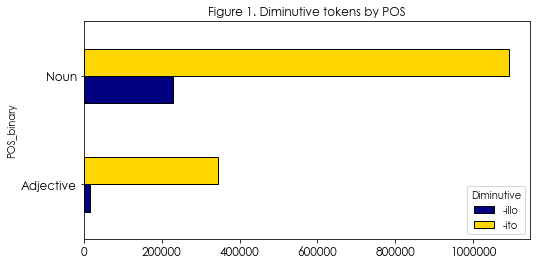

In [110]:
#Build plot

DiminutivexPOS.unstack().plot.barh(rot=0, figsize=(8,4), color=['navy', 'gold'], edgecolor='black', fontsize=12,
                                   title='Figure 1. Diminutive tokens by POS')

#Save plot

plt.savefig('../figures/DiminutivexPOS.png', dpi = 600)

- Interesting information here, as of now it appears that there's a bigger gap in usage depending on the part of speech. *-illo* might be markedly less common with adjectives.

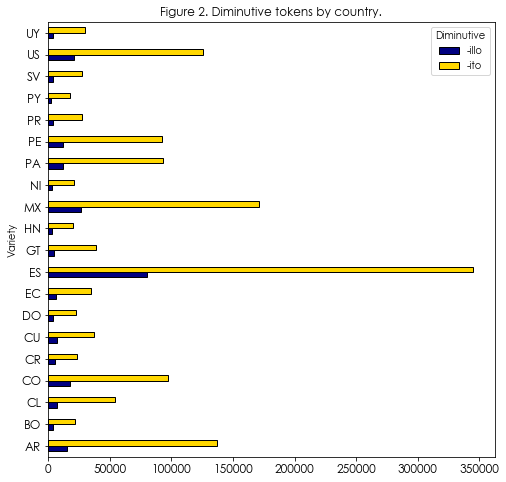

In [111]:
#Build plot

DiminutivexVariety.unstack().plot.barh(rot=0,figsize=(8,8),color=['navy', 'gold'], edgecolor='black', fontsize=12,
                                       title ='Figure 2. Diminutive tokens by country.')

#Save plot

plt.savefig('../figures/DiminutivexVariety.png', dpi = 600)

- Again, some more interesting information. The ratio is similar for most countries other than Spain, which is where *-illo* is claimed to be more productive in the descriptive literature.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDAB7F3948>,
      dtype=object)

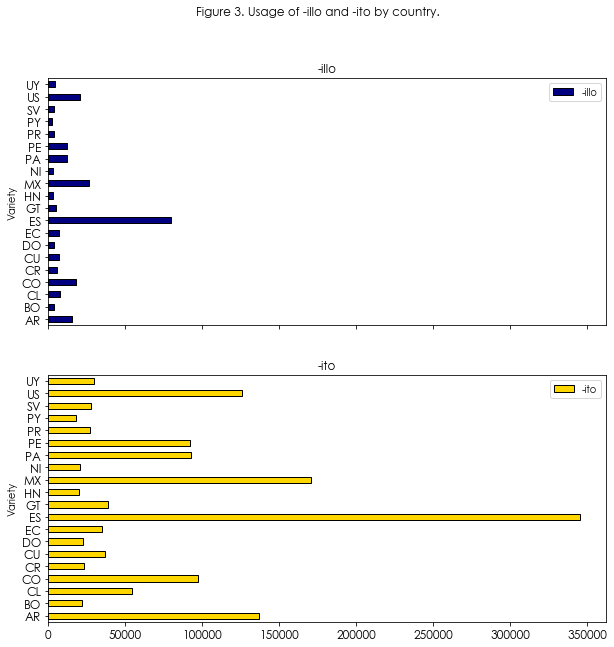

In [112]:
#Build plot

DiminutivexVariety.unstack().plot.barh(rot=0, figsize=(10,10), color=['navy', 'gold'], edgecolor='black', fontsize=12,
                                       subplots=True, title ='Figure 3. Usage of -illo and -ito by country.')
#Save plot

plt.savefig('../figures/DiminutivexVariety_subplots.png', dpi = 600)

- The difference appears to be clearer here for *-illo* usage. Again, this is preliminary given that I'm working with token counts and that I'm not using statistics yet, but it's a good point of departure.

## 4. Storing files

In [67]:
#Master data frame

master_DF.to_pickle('master_DF.pkl')

#Lexicon

lexicon.to_pickle('lexicon.pkl')